# ▒ 앙상블 ▒

## 0. 환경설정

In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor

import matplotlib.pyplot as plt

## 1. 데이터 불러오기

### Boston Housing Dataset

- 보스턴 주택 가격 데이터
- 1978년에 발표된 데이터로 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 정리
- 총 13가지의 요소들과 주택 가격으로 이루어져 있음.

### 데이터 호출

In [4]:
boston = load_boston()

X_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
y_boston = pd.DataFrame(boston.target, columns=['MEDV']).iloc[:,0]

### 데이터 분할
- Training set 70%, Test set 30% 무작위 추출을 이용하여 나누기


In [5]:
X_train, X_test, y_train, y_test = \
train_test_split(X_boston, y_boston, 
                 test_size = 0.3, random_state=123)

## 2. 앙상블

### 2.0 Decision Tree

In [52]:
tree = DecisionTreeRegressor(max_depth = 5,
                             random_state = 0)
tree.fit = tree.fit(X_train, y_train)

### 예측

In [56]:
tree_pred = tree.predict(X_test)
print((y_test-tree_pred).pow(2).mean())

17.602204873990754


### 2.1 Bagging

### 모형적합
- n_estimators : bootstrap의 개수 (bootstrap의 개수는 충분히 크게 하는것이 좋다.)

In [58]:
tree = DecisionTreeRegressor()
bag_model = BaggingRegressor(tree, n_estimators=1000, 
                             max_samples=0.8, random_state=1)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=1000, random_state=1)

### 예측

In [45]:
bag_pred = bag_model.predict(X_test)
print((y_test-bag_pred).pow(2).mean())

14.551381714144748


### 2.2 Random Forest

### 모형적합

In [7]:
rf_model = RandomForestRegressor(n_estimators = 1000,
                                  max_features = 3,
                                  min_samples_leaf = 3)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features=3, min_samples_leaf=3, n_estimators=1000)

### 예측

In [8]:
rf_pred = rf_model.predict(X_test)
print((y_test-rf_pred).pow(2).mean())

16.108529973176424


### Partial Dependence Plot

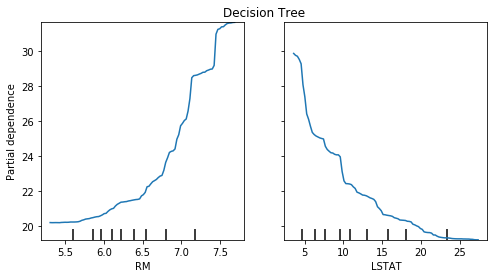

In [22]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Decision Tree", fontsize=12)
tree_disp = plot_partial_dependence(rf_model, X_train, ["RM","LSTAT"], ax=ax)

### Variable Importance Plot

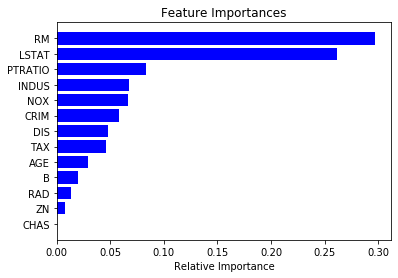

In [9]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [boston.feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.
